In [1]:
%load_ext autoreload
%autoreload 2

import text3d2video.wandb_util as wu
from text3d2video.artifacts.vertex_atributes_artifact import VertAttributesArtifact
from text3d2video.artifacts.animation_artifact import AnimationArtifact

In [20]:
features_3d_artifact_tag = 'deadpool-3d-features:latest'
animation_tag = 'rumba:latest'

features_3d = wu.get_artifact(features_3d_artifact_tag)
features_3d = VertAttributesArtifact.from_wandb_artifact(features_3d)
mv_features = features_3d.get_mv_features_from_lineage()

animation = wu.get_artifact(animation_tag)
animation = AnimationArtifact.from_wandb_artifact(animation)

wandb: Downloading large artifact deadpool-3d-features:latest, 20627.20MB. 480 files... 
wandb:   480 of 480 files downloaded.  
Done. 0:1:13.1
wandb: Downloading large artifact deadpool-mv-features:v9, 8841.61MB. 4330 files... 
wandb:   4330 of 4330 files downloaded.  
Done. 0:0:42.5
wandb: Downloading large artifact rumba:latest, 121.09MB. 61 files... 
wandb:   61 of 61 files downloaded.  
Done. 0:0:0.8


In [26]:
features_multidict = features_3d.get_disk_multidict()

features_multidict.keys()

ValueError: not enough values to unpack (expected 2, got 1)

In [3]:
from scripts.generate_video import render_feature_images

# render all feature images
all_feature_images = render_feature_images(
    features_3d,
    mv_features,
    animation,
    animation.frame_nums(sample_n=8)
)

/home/jorge/miniconda3/envs/thesis/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/jorge/miniconda3/envs/thesis/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/jorge/miniconda3/envs/thesis/lib/python3.8/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Bin size was too small in the coarse rasterization phase. This caused an overflow, meaning output may be incomplete. To solve, try increasing max_faces_per_bin / max_points_per_bin, decreasing bin_size, or setting bin_size to 0 to use the naive rasterization.Bin size was too small in the coarse rasterization phase. This caused an overflow, meaning output may be incomplete. To solve, try increasing max_faces_per_bin / max_points_per_bin, decreasing bin_size, or setting bin_size to 0 to use the naive rasterization.Bin size was too small in the coarse rasterization phase. This caused an overflow, meaning output may be incomplete. To solve, try increasing max_faces_per_bin / max_points_per_bin, decreasing bin_size, or setting bin_size to 0 to use the naive rasterization.Bin size was too small in the coarse rasterization phase. This caused an overflow, meaning output may be incomplete. To solve, try increasing max_faces_per_bin / max_points_per_bin, decreasing bin_size, or setting bin_size 

{'layer': 'down_blocks.2.attentions.1.transformer_blocks.0.attn1', 'timestep': '20'}
{'layer': 'up_blocks.3.attentions.1.transformer_blocks.0.attn1', 'timestep': '10'}
{'layer': 'up_blocks.2.attentions.1.transformer_blocks.0.attn1', 'timestep': '10'}
{'layer': 'up_blocks.2.attentions.1.transformer_blocks.0.attn1', 'timestep': '20'}
{'layer': 'up_blocks.1.attentions.1.transformer_blocks.0.attn1', 'timestep': '10'}
{'layer': 'up_blocks.2.attentions.2.transformer_blocks.0.attn1', 'timestep': '10'}
{'layer': 'down_blocks.1.attentions.0.transformer_blocks.0.attn1', 'timestep': '10'}
{'layer': 'down_blocks.0.attentions.0.transformer_blocks.0.attn1', 'timestep': '10'}
{'layer': 'up_blocks.3.attentions.0.transformer_blocks.0.attn1', 'timestep': '20'}
{'layer': 'down_blocks.2.attentions.0.transformer_blocks.0.attn1', 'timestep': '10'}
{'layer': 'down_blocks.1.attentions.1.transformer_blocks.0.attn1', 'timestep': '10'}
{'layer': 'down_blocks.0.attentions.1.transformer_blocks.0.attn1', 'timestep'

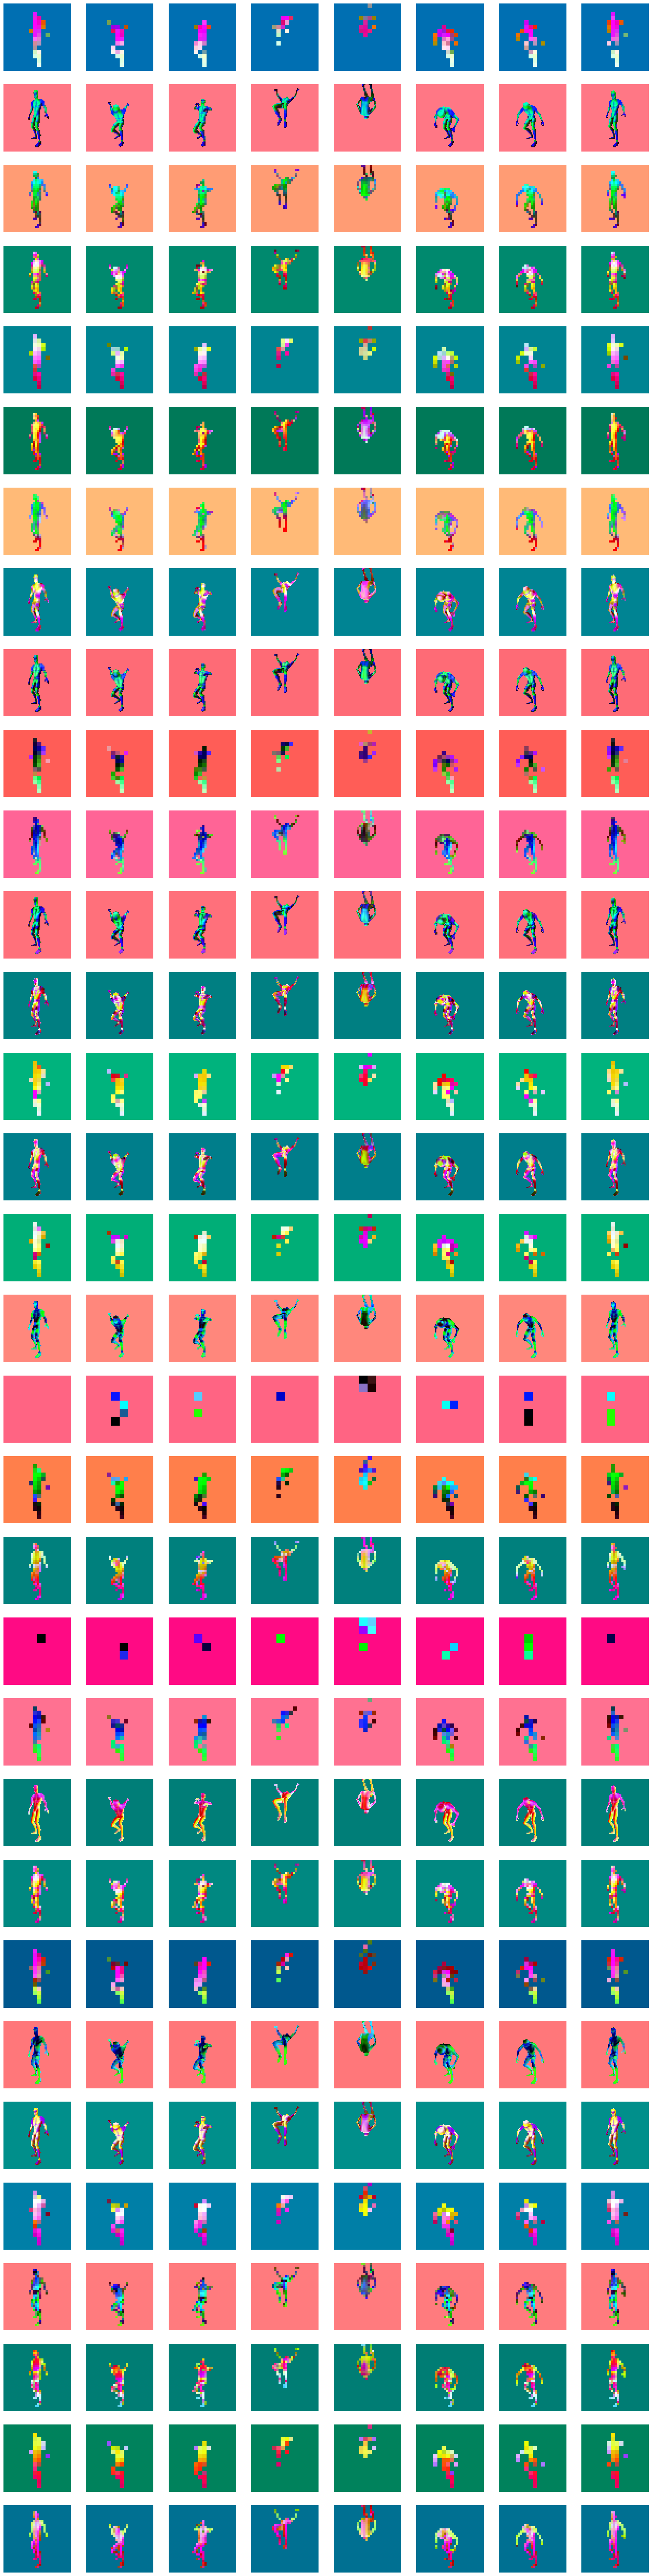

In [4]:
from einops import rearrange

from text3d2video.ipython_utils import display_ims
from text3d2video.visualization import RgbPcaUtil
import matplotlib.pyplot as plt

n_frames = all_feature_images.values()[0].shape[0]

n_rows = len(all_feature_images.keys())
n_cols = n_frames

scale = 3
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * scale, n_rows * scale))

for row_i, (identifier, feature_images) in enumerate(all_feature_images.items()):

    print(identifier)

    features_flat = rearrange(feature_images, "b c h w -> (b h w) c")
    pca = RgbPcaUtil.init_and_fit(features_flat.cpu())
    rgb_feature_images_pil = [
        pca.feature_map_to_rgb_pil(feature_image)
        for feature_image in feature_images.cpu()
    ]

    for col_i, rgb_feature_image_pil in enumerate(rgb_feature_images_pil):
        axs[row_i, col_i].imshow(rgb_feature_image_pil)
        axs[row_i, col_i].axis('off')
